## EDA

Split dataset between World category and individual countries

In [2]:
import pandas as pd
import json
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
co2= pd.read_csv('APP_A/cleaned_energy.csv')

In [4]:

world= co2.loc[co2['Country'] == 'World']
cont= co2.loc[co2['Country'] != 'World']
#all energy types
contALL= cont.loc[cont['Energy_type'] == 'all_energy_types']

In [5]:
fig= px.box(contALL, y='CO2_emission', animation_frame= 'Year', color='Continent', title="CO2 Emissions IQR change of Continents", template= 'plotly_dark')
fig.update_yaxes(type='log')
fig.update_layout({'title':{'x': 0.5, 'y': 0.9}})
fig.show()

Isolate North American countries to find CO2 Emissions for a list of years 

In [6]:
NA= contALL.loc[contALL['Continent'] == 'North America'][['Country', 'Year', 'CO2_emission']]

Find all energy types for World dataframe

In [7]:
w= world[world['Energy_type'] != 'all_energy_types']

Group Year and emissions for World and North and North American dataset. We combined them at the end to form the a datframe with median values for North America and the World.

In [8]:
world_emission= w.groupby('Year')['CO2_emission'].median().reset_index()
NA_emission= NA.groupby('Year')['CO2_emission'].median().reset_index()

world_emission['Country']= ['World']*len(world_emission)
NA_emission['Country']= ['North America']*len(NA_emission)

NA_emit= pd.concat([NA, world_emission])
NA_emit= pd.concat([NA_emit, NA_emission])

<b> What are the median values for North American countries compared to the Global CO2 emissions? <b>

In [9]:
#North American Countries
import plotly.graph_objects as go
years= []

for x in range(1989,2020,15):
   years.append(x)

for i in years:
   NA_plot= NA_emit[NA_emit['Year']== i].sort_values(by='CO2_emission', ascending=False).reset_index(drop=True)

   colors= ['#03588C']*len(NA_plot.index)
   colors[np.where(NA_plot['Country'] == 'World')[0][0]] = 'purple'
   colors[np.where(NA_plot['Country'] == 'North America')[0][0]] = 'gold'
   fig= go.Figure()

   fig.add_trace(go.Bar(x= NA_plot['Country'], y= NA_plot['CO2_emission'], marker_color= colors, ))
   fig.update_yaxes(type='log')

   fig.update_layout(
      {
         'title': { 
            'text': f"CO2 Emmisions of North American Countries {i}",
            'x' : 0.5,
            'y': 0.9,
            'font': {'size': 20}
            },
         'xaxis' : {
            'title' : 'Countries',
            'tickfont': {'size' : 10},
            'showticklabels': True
         },
         'yaxis': {
            'title' : 'CO2 Emissions (log)',
            'tickfont': {'size' : 10}
         },
         'template' : 'plotly_dark'
      }
   )

   fig.show()



<b> Do we have any strong correlations? <b>

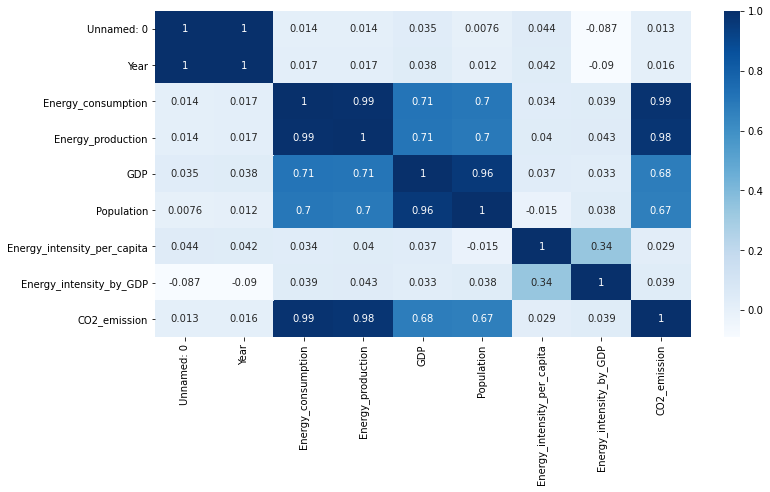

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(co2.corr(),cmap='Blues',annot=True)
plt.yticks(rotation='360')
plt.show()

Energy consumption, energy production, GDP, and Population seem to have a positive correlation with C02 emissions. We invoked in deeper analysis into these factors. 

<b> What are the total emissions for the top ten countries? <b>

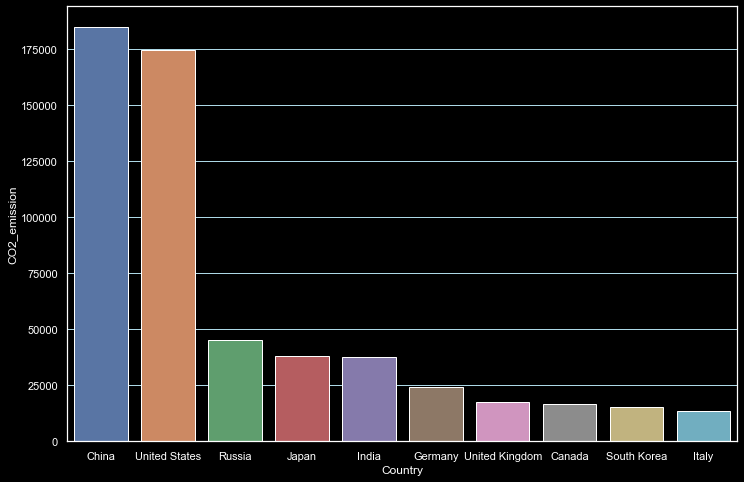

In [11]:
countries = contALL
top_countries = countries.groupby('Country').sum().sort_values(by='CO2_emission', ascending=False).head(10)
sns.set_palette('Blues_r')
sns.set(rc= {
    'axes.facecolor':'black', 
    'figure.facecolor': 'black', 
    'xtick.color': 'white', 
    'ytick.color': 'white',
    'axes.labelcolor': 'white',
    'grid.color' : 'lightblue',
    'text.color' : 'white'
    }
)


#change size: 
plt.figure(figsize = (12,8))

#seaborn barplot

sns.barplot(x= top_countries.index, y =top_countries['CO2_emission'])

In [12]:
countries = contALL
top_countries = countries.groupby('Country').sum().sort_values(by='CO2_emission', ascending=False).head(10)

fig= go.Figure()

fig.add_trace(go.Bar(x= top_countries.index, y= top_countries['CO2_emission']))
fig.update_yaxes(type='log')

fig.update_layout(
    {
        'title': { 
        'text': f"Top Ten Countries of CO2 Emmisions",
        'x' : 0.5,
        'y': 0.9,
        'font': {'size': 20}
        },
        'xaxis' : {
        'title' : 'Countries',
        'tickfont': {'size' : 10},
        'showticklabels': True
        },
        'yaxis': {
        'title' : 'CO2 Emissions (kg)',
        'tickfont': {'size' : 10}
        },
        'template' : 'plotly_dark'
    }
)

fig.show()

<b> What are the Carbon emissions of top countries? <b>

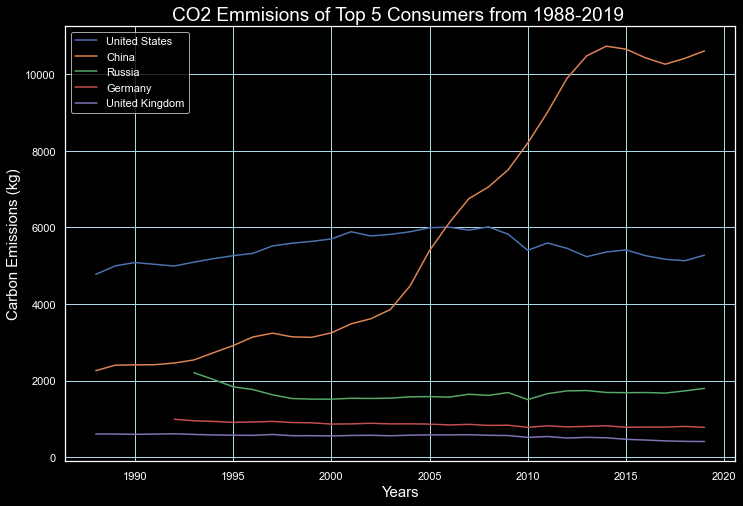

In [13]:
#Carbon Emissions of top countries from 1988-2019

plt.figure(figsize = (12,8))

sns.lineplot(countries[countries['Country'] == 'United States']['Year'], countries[countries['Country'] == 'United States']['CO2_emission'], label = 'United States')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['CO2_emission'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['CO2_emission'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['CO2_emission'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['CO2_emission'], label = 'United Kingdom')

plt.title('CO2 Emmisions of Top 5 Consumers from 1988-2019 ', size = 19)
plt.ylabel('Carbon Emissions (kg)', size = 15)
plt.xlabel('Years', size = 15);

<b> What is the GDP over the years of Top 5 CO2 emission producing countries? <b>

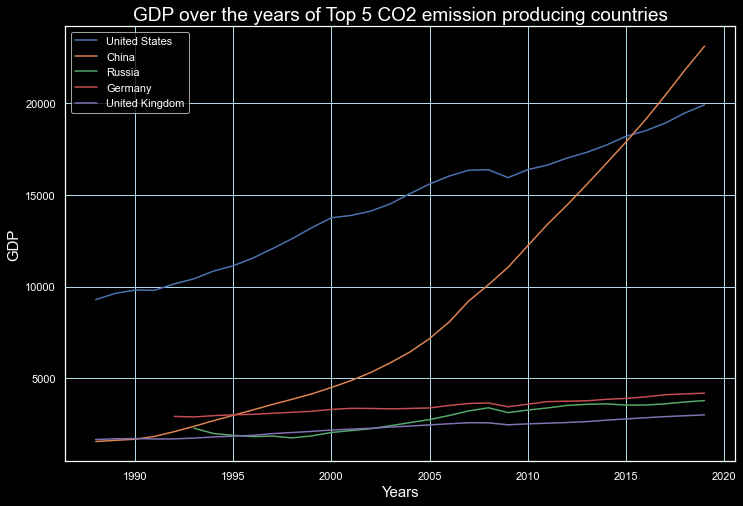

In [14]:
plt.figure(figsize = (12,8))

sns.lineplot(countries[countries['Country'] == 'United States']['Year'], countries[countries['Country'] == 'United States']['GDP'], label = 'United States')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['GDP'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['GDP'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['GDP'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['GDP'], label = 'United Kingdom')

plt.title('GDP over the years of Top 5 CO2 emission producing countries', size = 19)
plt.ylabel('GDP', size = 15)
plt.xlabel('Years', size = 15);

<b> What is the Energy intensity by GDP of Top 5 CO2 emission producing countries? <b>

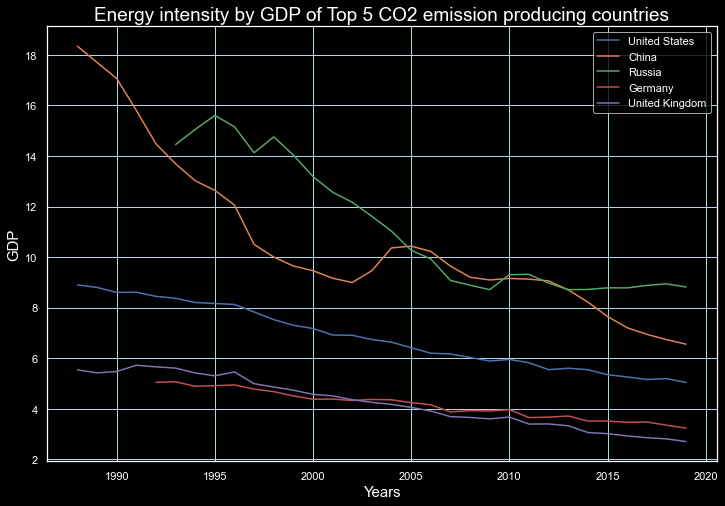

In [15]:
plt.figure(figsize = (12,8))

sns.lineplot(countries[countries['Country'] == 'United States']['Year'], countries[countries['Country'] == 'United States']['Energy_intensity_by_GDP'], label = 'United States')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['Energy_intensity_by_GDP'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['Energy_intensity_by_GDP'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['Energy_intensity_by_GDP'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['Energy_intensity_by_GDP'], label = 'United Kingdom')

plt.title('Energy intensity by GDP of Top 5 CO2 emission producing countries', size = 19)
plt.ylabel('GDP', size = 15)
plt.xlabel('Years', size = 15);

<b> What is the Energy intensity Per Capita of Top 5 CO2 emission producing countries? <b>

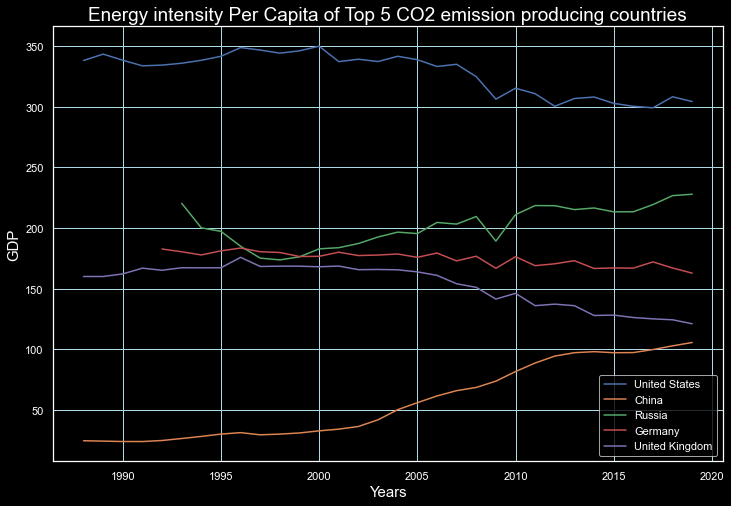

In [16]:
plt.figure(figsize = (12,8))

sns.lineplot(countries[countries['Country'] == 'United States']['Year'], countries[countries['Country'] == 'United States']['Energy_intensity_per_capita'], label = 'United States')
sns.lineplot(countries[countries['Country'] == 'China']['Year'], countries[countries['Country'] == 'China']['Energy_intensity_per_capita'], label = 'China')
sns.lineplot(countries[countries['Country'] == 'Russia']['Year'], countries[countries['Country'] == 'Russia']['Energy_intensity_per_capita'], label = 'Russia')
sns.lineplot(countries[countries['Country'] == 'Germany']['Year'], countries[countries['Country'] == 'Germany']['Energy_intensity_per_capita'], label = 'Germany')
sns.lineplot(countries[countries['Country'] == 'United Kingdom']['Year'], countries[countries['Country'] == 'United Kingdom']['Energy_intensity_per_capita'], label = 'United Kingdom')

plt.title('Energy intensity Per Capita of Top 5 CO2 emission producing countries', size = 19)
plt.ylabel('GDP', size = 15)
plt.xlabel('Years', size = 15);

In [17]:
us_etype_all= cont[cont['Country'] == 'United States']
us_etype_all= us_etype_all[us_etype_all['Energy_type'] != 'all_energy_types']

china_etype_all= cont[cont['Country'] == 'China']
china_etype_all= china_etype_all[china_etype_all['Energy_type'] != 'all_energy_types']


In [18]:
from plotly.subplots import make_subplots
fig= go.Figure()

figures = [
            px.line(us_etype_all, x= us_etype_all['Year'], y=us_etype_all['Energy_consumption'], symbol= us_etype_all['Energy_type'], color= us_etype_all['Energy_type']),
            px.line(china_etype_all, x= china_etype_all['Year'], y=china_etype_all['Energy_consumption'], symbol= china_etype_all['Energy_type'], color= china_etype_all['Energy_type'])
        ]

fig = make_subplots(rows=len(figures), cols=1, y_title="Energy Consumption", shared_xaxes=True, shared_yaxes= True, subplot_titles=("US Yearly Energy Consumption For Each Energy Type","China Yearly Energy Consumption For Each Energy Type")) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

        fig.update_layout(
            {
                'title': { 
                'x' : 0.5,
                'y': 0.95,
                'font': {'size': 20}
                },
                'xaxis' : {
                'tickfont': {'size' : 8},
                'showticklabels': True
                },
                'yaxis': {
                'tickfont': {'size' : 8}
                },
                'height' : 800,
                'width' : 800,
                'template' : 'plotly_dark'
            }
        )


fig.show()

In [19]:
fig= go.Figure()

figures = [
            px.line(us_etype_all, x= us_etype_all['Year'], y=us_etype_all['Energy_production'], symbol= us_etype_all['Energy_type'], color= us_etype_all['Energy_type']),
            px.line(china_etype_all, x= china_etype_all['Year'], y=china_etype_all['Energy_production'], symbol= china_etype_all['Energy_type'], color= china_etype_all['Energy_type']),
            ]

fig = make_subplots(rows=len(figures), cols=1, y_title="Energy Production", shared_xaxes=True, shared_yaxes= True, subplot_titles=("US Yearly Energy Production For Each Energy Type","China Yearly Energy Production For Each Energy Type")) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

        fig.update_layout(
            {
                'title': { 
                'x' : 0.5,
                'y': 0.95,
                'font': {'size': 20}
                },
                'xaxis' : {
                'tickfont': {'size' : 8},
                'showticklabels': True
                },
                'yaxis': {
                'tickfont': {'size' : 8}
                },
                'height' : 800,
                'width' : 800,
                'template' : 'plotly_dark'
            }
        )


fig.show()

In [20]:
fig= px.box(us_etype_all, y='Energy_consumption', color='Energy_type', title="US Total Energy Consumtion by Energy Type", template= 'plotly_dark')
fig.update_layout({'title':{'x': 0.5, 'y': 0.9}})
fig.show()

In [21]:
fig= px.box(china_etype_all, y='Energy_consumption', color='Energy_type', title="China's Total Energy Consumtion by Energy Type", template= 'plotly_dark')
fig.update_layout({'title':{'x': 0.5, 'y': 0.9}})
fig.show()

##WE ARE USING

In [22]:
contALL.head()
consumption= []
#sum of energy consumption
for i in contALL['Country'].unique():
    total= contALL[contALL['Country'] == i]['Energy_consumption'].sum(axis=0)
    consumption.extend([[i,total]])
#Making dataframe
consumption_data= pd.DataFrame(consumption, columns= ['Country', 'Total_Energy_Consumption'])
#Checking datatype and nulls
consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   193 non-null    object 
 1   Total_Energy_Consumption  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


What are the top 10 Energy Consumers over time?

In [23]:
#Sort Values 
consumption_data= consumption_data.sort_values(by='Total_Energy_Consumption', ascending= False)
fig= px.bar(consumption_data.head(10), x= 'Country', y='Total_Energy_Consumption', title= 'Top 10 Energy Consumers over time', template= 'plotly_dark')
fig.update_layout(
        {
    'title':{
            'x': 0.5, 
            'y': 0.9},
    'xaxis' : {
            'tickfont': {'size' : 10},
         },
    'yaxis': {
            'title' : 'Total Energy Consumption (quad Btu)',
            'tickfont': {'size' : 10}
            }
        })

fig.show()
## WE ARE USING

What is the Total Consumption of each energy Type for the Unted States and China? 

In [24]:
US_energy= cont[cont['Country']== 'United States'][cont['Energy_type'] != 'all_energy_types']
China_energy= cont[cont['Country']== 'China'][cont['Energy_type'] != 'all_energy_types']

<ipython-input-24-1b82712af3a6>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-24-1b82712af3a6>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [25]:
fig= px.bar(US_energy, x= 'Energy_type', y='Energy_consumption', title= 'Total Consumption of each Energy Type in the US', template= 'plotly_dark')
fig.update_layout(

        {
        'title':{
                'x': 0.5, 
                'y': 0.9},
        'xaxis' : {
                'title' : 'Energy Type',
                'tickfont': {'size' : 10},
                },
        'yaxis': {
                'title' : 'Energy Consumption (quad Btu)',
                'tickfont': {'size' : 10}
                }
                })

fig.show()

In [26]:

fig= px.bar(China_energy, x= 'Energy_type', y='Energy_consumption', title= 'Total Consumption of each Energy Type in China', template= 'plotly_dark')
fig.update_layout(
        {
    'title':{
            'x': 0.5, 
            'y': 0.9},
    'xaxis' : {
            'title' : 'Energy Type',
            'tickfont': {'size' : 10},
         },
    'yaxis': {
            'title' : 'Energy Consumption (quad Btu)',
            'tickfont': {'size' : 10}
            }
        })

fig.show()


Who consumes the most of each energy type?

In [27]:

etype_coal= cont[cont['Energy_type'] == 'coal'].groupby(['Country'])['Energy_consumption'].sum().reset_index().sort_values(by='Energy_consumption', ascending= False)
etype_gas= cont[cont['Energy_type'] == 'natural_gas'].groupby(['Country'])['Energy_consumption'].sum().reset_index().sort_values(by='Energy_consumption', ascending= False)
etype_liquid= cont[cont['Energy_type'] == 'petroleum_n_other_liquids'].groupby(['Country'])['Energy_consumption'].sum().reset_index().sort_values(by='Energy_consumption', ascending= False)
etype_nuclear= cont[cont['Energy_type'] == 'nuclear'].groupby(['Country'])['Energy_consumption'].sum().reset_index().sort_values(by='Energy_consumption', ascending= False)
etype_renewable= cont[cont['Energy_type'] == 'renewables_n_other'].groupby(['Country'])['Energy_consumption'].sum().reset_index().sort_values(by='Energy_consumption', ascending= False)


In [28]:

fig=px.bar(etype_coal.head(5), x= 'Country', y='Energy_consumption', title='Coal', template= 'plotly_dark')
fig.update_layout(
        {
        'title':{
        
                'x': 0.5, 
                'y': 0.9},
        'xaxis' : {
                'title' : 'Country',
                'tickfont': {'size' : 8},
                },
        'yaxis': {
                'title' : 'Energy Consumption (quad Btu)',
                'tickfont': {'size' : 8}
                },
        'height' : 400,
        'width' : 500})

fig.show()

##WE ARE USING

In [29]:

fig= px.bar(etype_gas.head(5), x= 'Country', y='Energy_consumption', title= 'Natural Gas', template= 'plotly_dark')
fig.update_layout(
        {
        'title':{
        
                'x': 0.5, 
                'y': 0.9},
        'xaxis' : {
                'title' : 'Country',
                'tickfont': {'size' : 8},
                },
        'yaxis': {
                'title' : 'Energy Consumption (quad Btu)',
                'tickfont': {'size' : 8}
                },
        'height' : 400,
        'width' : 500})

fig.show()
#WE ARE USING

In [30]:

fig= px.bar(etype_liquid.head(5), x= 'Country', y='Energy_consumption', title= 'Petroleum and other liquids', template= 'plotly_dark')
fig.update_layout(
        {
        'title':{
        
                'x': 0.5, 
                'y': 0.9},
        'xaxis' : {
                'title' : 'Country',
                'tickfont': {'size' : 8},
                },
        'yaxis': {
                'title' : 'Energy Consumption (quad Btu)',
                'tickfont': {'size' : 8}
                },
        'height' : 400,
        'width' : 500})

fig.show()

#WE ARE USING


In [31]:

fig= px.bar(etype_nuclear.head(5), x= 'Country', y='Energy_consumption', title= 'Nuclear', template= 'plotly_dark')
fig.update_layout(
        {
        'title':{
        
                'x': 0.5, 
                'y': 0.9},
        'xaxis' : {
                'title' : 'Country',
                'tickfont': {'size' : 8},
                },
        'yaxis': {
                'title' : 'Energy Consumption (quad Btu)',
                'tickfont': {'size' : 8}
                },
        'height' : 400,
        'width' : 500})

fig.show()

#WE ARE USING


In [32]:

fig= px.bar(etype_renewable.head(5), x= 'Country', y='Energy_consumption', title= 'Renewables and other', template= 'plotly_dark')
fig.update_layout(
        {
        'title':{
        
                'x': 0.5, 
                'y': 0.9},
        'xaxis' : {
                'title' : 'Country',
                'tickfont': {'size' : 6},
                },
        'yaxis': {
                'title' : 'Energy Consumption (quad Btu)',
                'tickfont': {'size' : 6}
                },
        'height' : 400,
        'width' : 500})

fig.show()

#WE ARE USING

    

What is the Energy Intensity Per Capita of top 5 Consumers?

In [34]:
temp_Allc= contALL[['Country', 'Year', 'CO2_emission']].groupby(['Country','Year']).sum().reset_index()
temp_Allc

,Country,Year,CO2_emission
0,Afghanistan,1988,3.646724
1,Afghanistan,1989,6.056769
2,Afghanistan,1990,6.024287
3,Afghanistan,1991,5.926061
4,Afghanistan,1992,2.693772
...,...,...,...
5919,Zimbabwe,2015,11.298275
5920,Zimbabwe,2016,11.820449
5921,Zimbabwe,2017,10.417494
5922,Zimbabwe,2018,9.243046


In [35]:

fig2= px.choropleth(data_frame=temp_Allc, locations= 'Country', locationmode= 'country names', animation_frame= 'Year', color= 'CO2_emission', template= 'plotly_dark', color_continuous_scale='Tropic')
        
fig2.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>CO2 Emissions Over Time</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    )
)
    
